# DATA SCIENCE PROJECT
## BY BHARAT  : INTERN
## DONE BY       : Sakshi Tanwar
## PROJECT 1   : NUMBER RECOGNITION USING LSTM

### Importing the necessary libraraies

In [ ]:
import tensorflow as t
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Keras Inbuild DataSet

In [ ]:
from keras.datasets import mnist
import keras

(X_train,y_train), (X_test,y_test) = mnist.load_data()
print("Training size of mnist datasets",len(X_train))
print("Test size of mnist dataset",len(X_test))

11490434/11490434 [==============================] - 0s 0us/step
Training size of mnist datasets 60000
Test size of mnist dataset 10000


# Visualise First Six Training Image

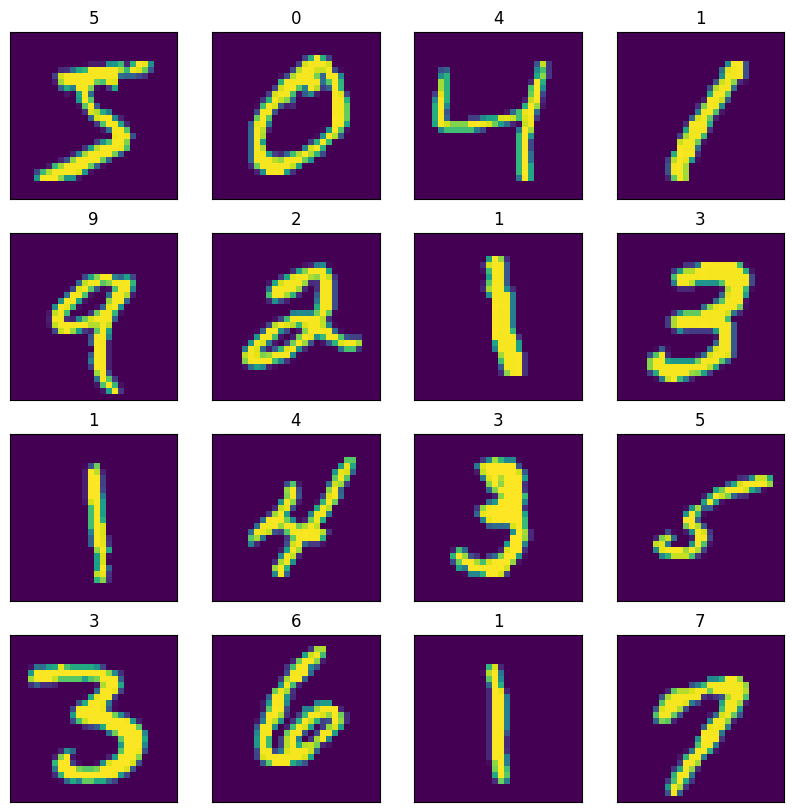

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import matplotlib.cm as cm
%matplotlib inline

fig = plt.figure(figsize=(10,10))
for i in range(16):
  ax = fig.add_subplot(4,4,i+1,xticks=[],yticks=[])
  ax.imshow(X_train[i])
  ax.set_title(str(y_train[i]))


# Visualise Image In More Detail

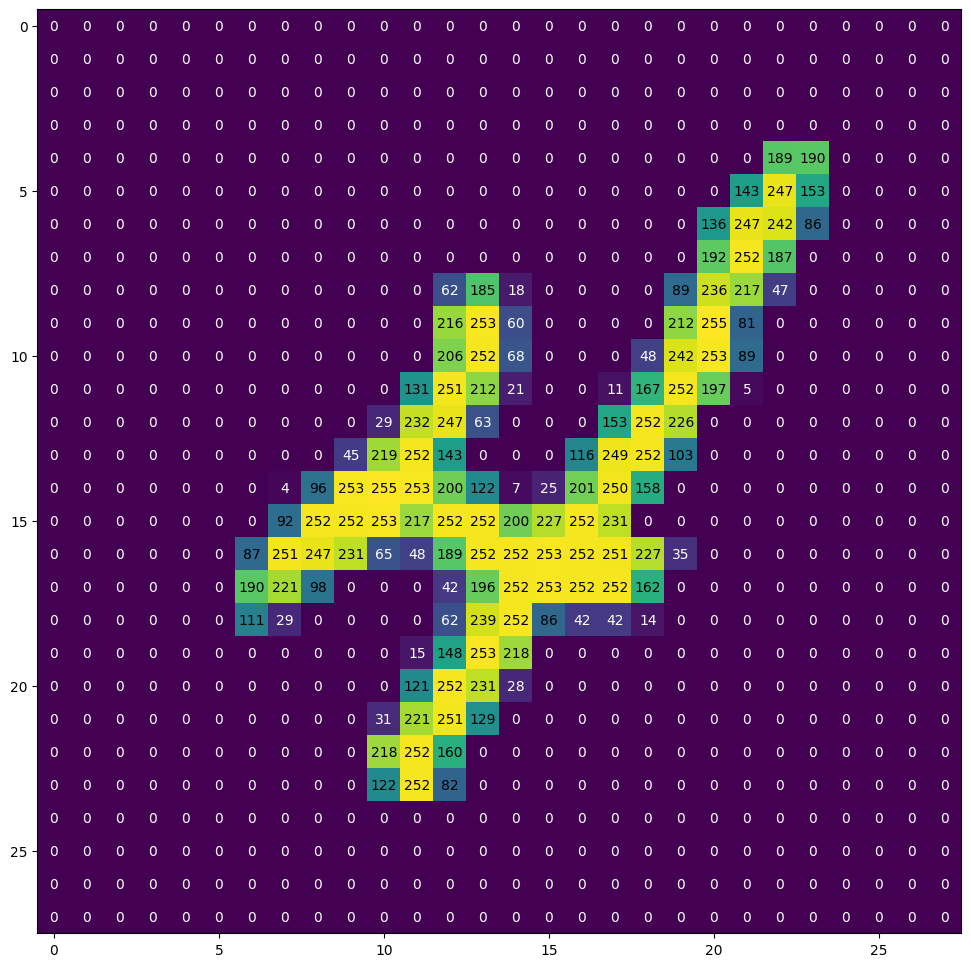

In [ ]:
def visualize_input(img, ax):
  ax.imshow(img)
  width, height = img.shape
  thresh = img.max()/3.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[x][y]<thresh else 'black')
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[9], ax)


# Preprocess The Input Image

In [ ]:
# Scale the every image pixel by 255
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 


# Printing the shape of training and test
print("The shape of training",X_train.shape)
print("The shape of testing",X_test.shape)



The shape of training (60000, 28, 28)
The shape of testing (10000, 28, 28)


In [ ]:
# Convert Categorical to numerical
from keras.utils import np_utils
num_classes = 10
#print("Total Class is Present",y_train[:10])

y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


In [ ]:
# Printing one hot encoded labels
print("First one hot encoded labels",y_train[:10])

First one hot encoded labels [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# Reshape the data to fit CNN model
img_rows, img_cols = 28,28

X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)
print("Input shape",input_shape)
print("Training shape",X_train.shape)
print("Testing shape",X_test.shape)


Input shape (28, 28, 1)
Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


# Define Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Getting model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
from gc import callbacks
# Fit model
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, svae_best_only=True )

model.fit(X_train,y_train, batch_size=64, epochs=10, validation_data=(X_test,y_test), callbacks=[checkpointer], verbose=2, shuffle=True )

Epoch 1/10

Epoch 1: saving model to model.weights.best.hdf5
938/938 - 5s - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0262 - val_accuracy: 0.9918 - 5s/epoch - 5ms/step
Epoch 2/10

Epoch 2: saving model to model.weights.best.hdf5
938/938 - 4s - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0591 - val_accuracy: 0.9846 - 4s/epoch - 5ms/step
Epoch 3/10

Epoch 3: saving model to model.weights.best.hdf5
938/938 - 5s - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0388 - val_accuracy: 0.9911 - 5s/epoch - 5ms/step
Epoch 4/10

Epoch 4: saving model to model.weights.best.hdf5
938/938 - 4s - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0340 - val_accuracy: 0.9910 - 4s/epoch - 5ms/step
Epoch 5/10

Epoch 5: saving model to model.weights.best.hdf5
938/938 - 4s - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0434 - val_accuracy: 0.9893 - 4s/epoch - 4ms/step
Epoch 6/10

Epoch 6: saving model to model.weights.best.hdf5
938/938 - 5s - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0408 - val_accurac

In [ ]:
# Prediction on test data
model.predict(X_test)

# Model Evaluation


In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0455 - accuracy: 0.9908


[0.04545021429657936, 0.9908000230789185]

In [ ]:
import matplotlib.pyplot as plt

accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']

epochs = range(1,len(accuracy)+1)

plt.plot(epochs,accuracy,'bo',label='accuracy')
plt.plot(epochs,val_accuracy,'b',label='val_loss')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='loss')
plt.plot(epochs,val_loss,'b',label='val_loss')
plt.legend()
plt.show()
